# Hyperparameter tuning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('/kaggle/input/healthy-lifestyle/Train_processed.csv',index_col=[0])

In [3]:
data.sample(7)

,Specific ailments,Age,BMI,Illness count last year,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,...,DX1,DX2,DX3,DX4,DX5,DX6,Smoker_NO,Smoker_YES,Living_URBAN,Healthy
25658,34,17,26.202061,2.000000,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
23086,25,52,23.214488,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
18879,52,47,27.396334,3.000000,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
20506,11,46,26.683490,1.752756,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
11345,33,3,18.126976,2.000000,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0
22067,28,64,19.430955,2.000000,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
15427,21,31,27.149226,2.000000,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0


In [4]:
X = data.drop(['Healthy'], axis=1)
y = data['Healthy']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [6]:
ss_os = StandardScaler()
ss_us = StandardScaler()
ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)

In [7]:
# oversampling
X_train_os, y_train_os = ros.fit_resample(X_train, y_train)

# 1. std scaling
X_train_os_s = ss_os.fit_transform(X_train_os)
y_train_os_s = y_train_os # although the same, but doing for clarity

# 2. no std scaling
X_train_os_ns = X_train_os
y_train_os_ns = y_train_os

In [8]:
# undersampling
X_train_us, y_train_us = rus.fit_resample(X_train, y_train)

# 1. std scaling
X_train_us_s = ss_us.fit_transform(X_train_us)
y_train_us_s = y_train_us # although the same, but doing for clarity

# 2. no std scaling
X_train_us_ns = X_train_us
y_train_us_ns = y_train_us

In [9]:
rf1 =  RandomForestClassifier()
rf2 =  RandomForestClassifier()
rf3 =  RandomForestClassifier()
rf4 =  RandomForestClassifier()

In [10]:
rf1.fit(X_train_os_s, y_train_os_s)
rf2.fit(X_train_os_ns, y_train_os_ns)
rf3.fit(X_train_us_s, y_train_us_s)
rf4.fit(X_train_us_ns, y_train_us_ns)

RandomForestClassifier()

In [11]:
def eval(model, X_test, y_test):
    y_test = np.array(y_test).reshape(-1, 1)
    cm = confusion_matrix(y_test, model.predict(X_test), labels=model.classes_)
    print("Model Score: ", model.score(X_test, y_test))
    print("F1 score: ", f1_score(y_test, model.predict(X_test)))
    print("Confusion Matrix: \n")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()
    print("Classification report: \n",classification_report(y_test, model.predict(X_test)))
    print('----------------------------------------------------------')

Model Score:  0.7457561728395061
F1 score:  0.8
Confusion Matrix: 



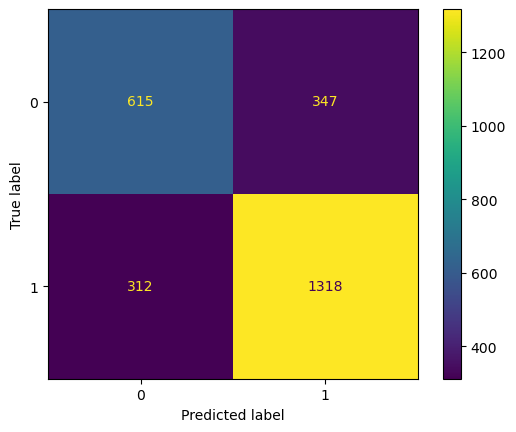

Classification report: 
               precision    recall  f1-score   support

           0       0.66      0.64      0.65       962
           1       0.79      0.81      0.80      1630

    accuracy                           0.75      2592
   macro avg       0.73      0.72      0.73      2592
weighted avg       0.74      0.75      0.74      2592

----------------------------------------------------------
Model Score:  0.7426697530864198
F1 score:  0.7975720789074355
Confusion Matrix: 



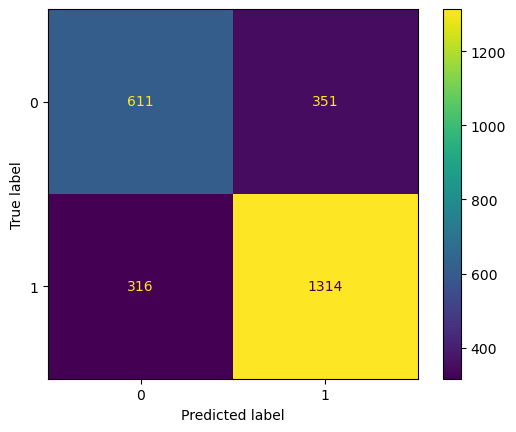

Classification report: 
               precision    recall  f1-score   support

           0       0.66      0.64      0.65       962
           1       0.79      0.81      0.80      1630

    accuracy                           0.74      2592
   macro avg       0.72      0.72      0.72      2592
weighted avg       0.74      0.74      0.74      2592

----------------------------------------------------------
Model Score:  0.7272376543209876
F1 score:  0.7725956899324541
Confusion Matrix: 



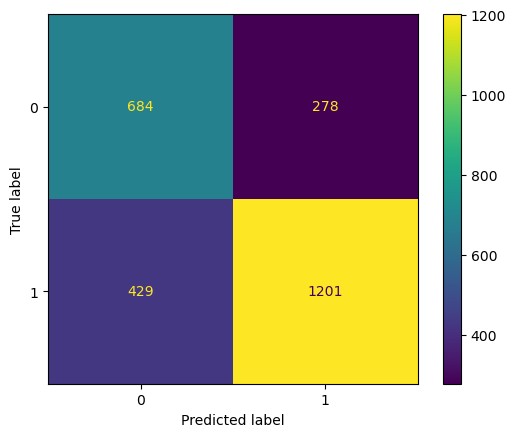

Classification report: 
               precision    recall  f1-score   support

           0       0.61      0.71      0.66       962
           1       0.81      0.74      0.77      1630

    accuracy                           0.73      2592
   macro avg       0.71      0.72      0.72      2592
weighted avg       0.74      0.73      0.73      2592

----------------------------------------------------------
Model Score:  0.7268518518518519
F1 score:  0.7720540888602704
Confusion Matrix: 



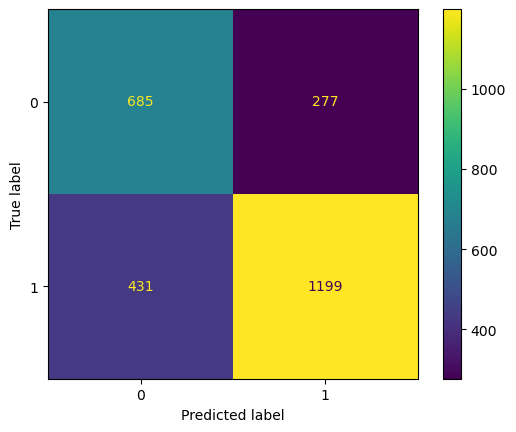

Classification report: 
               precision    recall  f1-score   support

           0       0.61      0.71      0.66       962
           1       0.81      0.74      0.77      1630

    accuracy                           0.73      2592
   macro avg       0.71      0.72      0.72      2592
weighted avg       0.74      0.73      0.73      2592

----------------------------------------------------------


In [12]:
eval(rf1, ss_os.transform(X_test), y_test)
eval(rf2, X_test, y_test)

eval(rf3, ss_us.transform(X_test), y_test)
eval(rf4, X_test, y_test)

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

def find_best_hyper_params_using_gridsearchcv(X,y):
    algos = { # a python dictionary
        "Random Forest Classifier" : {
            "model": RandomForestClassifier(),
            "params": {
                "criterion":["gini", "entropy"],
                "max_depth": [6,8,10,12,None],
                'n_estimators': [80,128,200,300],
                'min_samples_split' : [2,4],
                'min_samples_leaf':[1,2,3],
                'max_samples':[0.75,0.80,0.9]
            }
        },
    }
    mod_scores = []
    cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config["model"], config["params"], cv=cv, return_train_score=False,scoring='f1', n_jobs=-1,verbose=4)
        gs.fit(X_train_os_s, y_train_os_s)
        mod_scores.append({
            "model": algo_name,
            "best_score": gs.best_score_,
            "best_params": gs.best_params_
        })
    df_df = pd.DataFrame(gs.cv_results_)
    # df_df = df_df.sort_values()
    df_df.to_csv('/kaggle/working/gs_cv_results.csv')
    return pd.DataFrame(mod_scores,columns=["model","best_score","best_params"])

performance = find_best_hyper_params_using_gridsearchcv(X_train, y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV 3/3] END criterion=gini, max_depth=6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=80;, score=0.742 total time=   1.6s
[CV 3/3] END criterion=gini, max_depth=6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=128;, score=0.745 total time=   2.8s
[CV 1/3] END criterion=gini, max_depth=6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.742 total time=   5.7s
[CV 3/3] END criterion=gini, max_depth=6, max_samples=0.75, min_samples_leaf=1, min_samples_split=4, n_estimators=80;, score=0.745 total time=   1.5s
[CV 3/3] END criterion=gini, max_depth=6, max_samples=0.75, min_samples_leaf=1, min_samples_split=4, n_estimators=128;, score=0.740 total time=   2.4s
[CV 1/3] END criterion=gini, max_depth=6, max_samples=0.75, min_samples_leaf=1, min_samples_split=4, n_estimators=300;, score=0.739 total time=   6.2s
[CV 3/3] END criterion=gini, max_depth=6, max_samples=0.75, min_samples_leaf=2, min_samples_spli

In [15]:
performance['best_score'], dict(performance['best_params'])

(0    0.847558
 Name: best_score, dtype: float64,
 {0: {'criterion': 'entropy',
   'max_depth': None,
   'max_samples': 0.75,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 300}})

[CV 3/3] END criterion=entropy, max_depth=None, max_samples=0.9, min_samples_leaf=3, min_samples_split=2, n_estimators=128;, score=0.803 total time=   5.6s
[CV 1/3] END criterion=entropy, max_depth=None, max_samples=0.9, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=0.820 total time=  13.4s
[CV 3/3] END criterion=entropy, max_depth=None, max_samples=0.9, min_samples_leaf=3, min_samples_split=4, n_estimators=80;, score=0.805 total time=   3.6s
[CV 2/3] END criterion=entropy, max_depth=None, max_samples=0.9, min_samples_leaf=3, min_samples_split=4, n_estimators=128;, score=0.814 total time=   6.0s
[CV 3/3] END criterion=entropy, max_depth=None, max_samples=0.9, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=0.805 total time=   8.9s
[CV 3/3] END criterion=entropy, max_depth=None, max_samples=0.9, min_samples_leaf=2, min_samples_split=4, n_estimators=300;, score=0.816 total time=  14.4s
[CV 1/3] END criterion=entropy, max_depth=None, max_samples=0.9, 

# Prediction

In [16]:
random_forest = RandomForestClassifier(criterion='entropy', max_depth=None, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=300)

In [22]:
random_forest1 = RandomForestClassifier(criterion='entropy', max_depth=None, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=300)

In [17]:
random_forest.fit(X_train_os_s, y_train_os_s)

RandomForestClassifier(criterion='entropy', max_samples=0.75, n_estimators=300)

In [23]:
# just checking model score on hackathon test set by training it on entire train set
sss = StandardScaler()
X_s = sss.fit_transform(X)

In [24]:
random_forest1.fit(X_s, y)

RandomForestClassifier(criterion='entropy', max_samples=0.75, n_estimators=300)

Model Score:  0.7530864197530864
F1 score:  0.805115712545676
Confusion Matrix: 



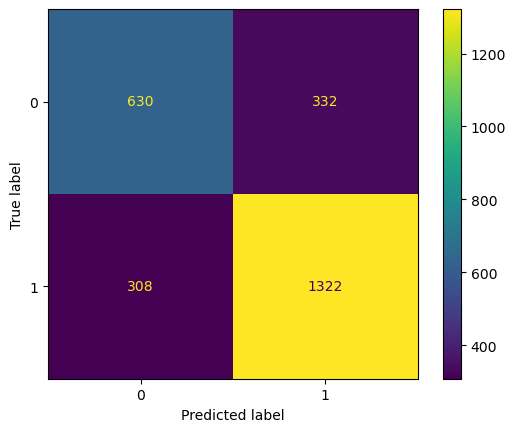

Classification report: 
               precision    recall  f1-score   support

           0       0.67      0.65      0.66       962
           1       0.80      0.81      0.81      1630

    accuracy                           0.75      2592
   macro avg       0.74      0.73      0.73      2592
weighted avg       0.75      0.75      0.75      2592

----------------------------------------------------------


In [18]:
eval(random_forest, ss_os.transform(X_test), y_test)

In [19]:
test_df = pd.read_csv('/kaggle/input/healthy-lifestyle/Test_processed.csv')

In [20]:
y_test_pred = random_forest.predict(ss_os.transform(test_df))

In [21]:
## creating csv for submission
result = pd.DataFrame(y_test_pred, columns = ['predictions'])
result.to_csv("/kaggle/working/Submission.csv", index=False)

In [25]:
y_test_pred1 = random_forest1.predict(sss.transform(test_df))

In [26]:
## creating csv for submission
result1 = pd.DataFrame(y_test_pred1, columns = ['predictions'])
result1.to_csv("/kaggle/working/Submission1.csv", index=False)